# Inaugural Project

**Group members:** Hjalte Bisgaard, Julie Roesgaard og Sissel Andersen

**Date of hand-in:** 26. March 2023 

This project is the first of three in the course **Introduction to Programming and Numerical Analysis**. 

The project treats a household optimization problem and solves in multiple ways. 

Each question will have a short introduction and conclusion.

Imports and set magics:

In [47]:
# -*- coding: utf-8 -*-
%reload_ext autoreload
%autoreload 2
%matplotlib inline

#importing modules
import numpy as np
from   mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt 
import pandas as pd 
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy import optimize

# importing our class for the optimization problem
from householdoptimization import HouseholdOptimizationClass

# Question 1

In question 1 we solve the model using different values of the parameters alpha and sigma. In particular we use the following values as inputs:

$$\alpha = \{0.25, 0.50, 0.75\}$$
$$\sigma = \{0.50, 0.10, 1.50\}$$

For these vectors of inputs we return and illustrate the solution using a vector of ratio-solutions:

$$\frac{H_F}{H_M}$$

**STRUCTURE:**

**BLOCK 1.1:** We use a for loop over alpha and sigma to solve for the ratio of hours spent working within the home. 

**BLOCK 1.2:** We merge the ratio of $\frac{H_F}{H_M}$ together with the corresponding values of alpha and sigma using the zip-function, after which we plots the results.

In [48]:
### BLOCK 1.1 ### 

# Calling the class
func = HouseholdOptimizationClass()

# Defining the alpha and sigma values to loop over 
alphas = [0.25, 0.5, 0.75]
sigmas = [0.5, 1, 1.5]

# Creating a dataframe for the alpha and sigma solutions
df_alphas_sigmas = pd.DataFrame(index=alphas, columns=sigmas)
ratio_discrete = []

# Creating a nested for loop
for alpha in alphas:
    for sigma in sigmas:
        func.par.alpha = alpha
        func.par.sigma = sigma
        solution_discrete = func.solve_discrete()
        ratio_discrete = solution_discrete.HF/solution_discrete.HM
        #print(ratio_discrete)

        # add our solutions to the dataframe
        df_alphas_sigmas.loc[alpha, sigma] = ratio_discrete

print(df_alphas_sigmas)

/Users/sisselandersen/Desktop/Introduction to programming/projects-2023-bpr871/inauguralproject/householdoptimization.py:86: RuntimeWarning: divide by zero encountered in power
  H = ((1-par.alpha)*HM**((par.sigma-1)/(par.sigma + 1e-8)) + par.alpha*HF**((par.sigma-1)/(par.sigma + 1e-8)))**((par.sigma)/(par.sigma-1 + 1e-8))
/Users/sisselandersen/Desktop/Introduction to programming/projects-2023-bpr871/inauguralproject/householdoptimization.py:91: RuntimeWarning: invalid value encountered in reciprocal
  utility = np.fmax(Q,1e-8)**(1-par.rho)/(1-par.rho + 1e-8)


           0.5       1.0       1.5
0.25  0.545455  0.307692  0.214286
0.50       1.0       1.0       1.0
0.75  1.833333      3.25  4.666667


Text(0.5, 0, 'HF/HM')

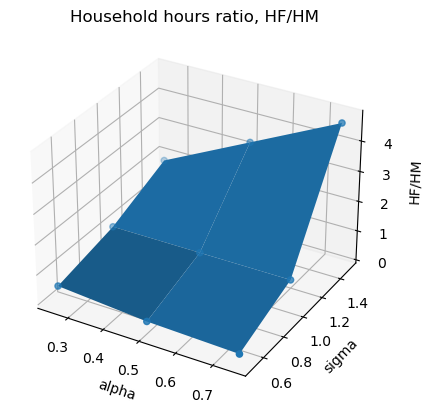

In [49]:
### BLOCK 1.2 ### 

from mpl_toolkits.mplot3d import Axes3D

# Creating a meshgrid for the alpha and sigma values
alpha_values, sigma_values = np.meshgrid(alphas, sigmas)


# Set up figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(alpha_values, sigma_values, df_alphas_sigmas.values)
ax.scatter(alpha_values, sigma_values, df_alphas_sigmas.values)


# Adding labels
ax.set_title(f'Household hours ratio, HF/HM')
ax.set_xlabel(f'alpha')
ax.set_ylabel(f'sigma')
ax.set_zlabel(f'HF/HM')

# Question 2

For question 2 we use given alpha and sigma parameters and solve the model discretely using a vector of inputs for wF. We again plot the results for the ratio $\frac{H_F}{H_M}$. This time the results are transformed using the logarithmic function. We use the following inputs for the female wage level:

$$w_F = \{0.8, 0.9, 1.0, 1.1, 1.2\}$$

**STRUCTURE:**

**BLOCK 2.1:** Solves the model for given wage levels

**BLOCK 2.2:** Plots the result of the model for different wage levels

In [50]:
### BLOCK 2.1 ###

#code for solving the model
solution_wage = []

HM_wage_vec = ()
HF_wage_vec = ()
wF = (0.8, 0.9, 1.0, 1.1, 1.2)


# b. for loop
for wages in wF:
    func = HouseholdOptimizationClass()
    func.par.wF = wages
    solution_wage.append(func.solve_discrete())
    
#c. extracting results
HF_wage_vec = [ns.HF for ns in solution_wage]
HM_wage_vec = [ns.HM for ns in solution_wage]

ratio_H_dis = [np.log(a/b) for a, b in zip(HF_wage_vec, HM_wage_vec)]
ratio_w_dis = np.log(wF)

#ratio_wage = np.log[HF_wage_vec/HM_wage_vec]
print(ratio_H_dis)
print(ratio_w_dis)

/Users/sisselandersen/Desktop/Introduction to programming/projects-2023-bpr871/inauguralproject/householdoptimization.py:91: RuntimeWarning: invalid value encountered in reciprocal
  utility = np.fmax(Q,1e-8)**(1-par.rho)/(1-par.rho + 1e-8)


[0.22314355131420976, 0.0, 0.0, -0.11778303565638351, -0.2231435513142097]
[-0.22314355 -0.10536052  0.          0.09531018  0.18232156]


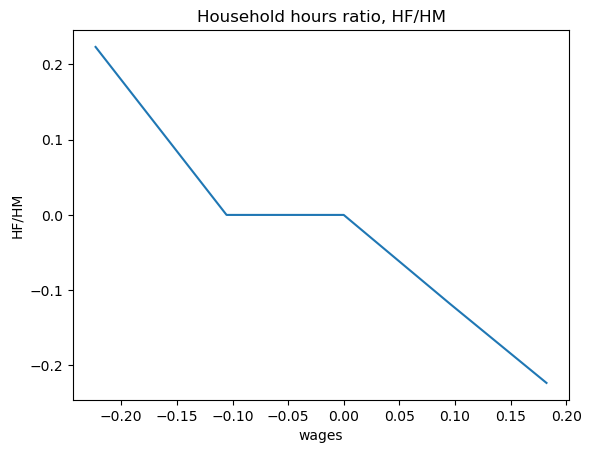

In [51]:
### BLOCK 2.2 ###

#code for plotting the results
def plot_wages():
    # a. create the figure
    fig = plt.figure()

    # b. plot
    ax = fig.add_subplot(1,1,1)

    ax.plot(ratio_w_dis,ratio_H_dis)

    ax.set_title(f'Household hours ratio, HF/HM')
    ax.set_xlabel(f'wages')
    ax.set_ylabel(f'HF/HM')

plot_wages()

# Question 3

For question 3 we solve the model continuously using an optimize.minimize function. 

**STRUCTURE:** 

**BLOCK 3.1:** Solves the model for given wage levels

**BLOCK 3.2:** Plots the result of HF/HM as well as wF/wM against the different values of wF.

In [52]:
### BLOCK 3.1 ###
ratio_H, ratio_w = func.get_ratios()

/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_minimize.py:569: RuntimeWarning: Method Nelder-Mead cannot handle constraints.
  warn('Method %s cannot handle constraints.' % method,


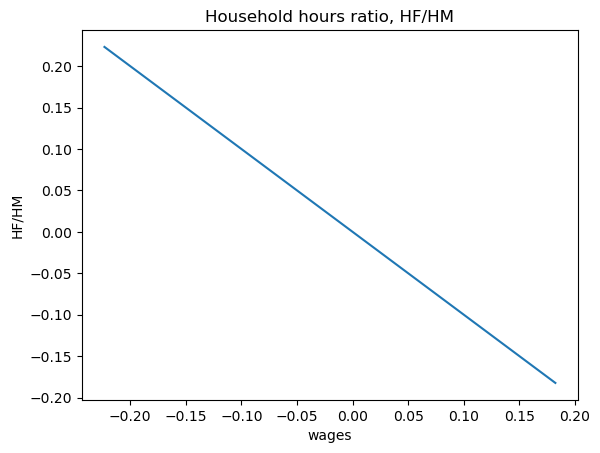

In [53]:
### BLOCK 3.2 ###

#plotting the results
def plot_wages_cont():
    # a. create the figure
    fig = plt.figure()

    # b. plot
    ax = fig.add_subplot(1,1,1)

    ax.plot(ratio_w,ratio_H)

    ax.set_title(f'Household hours ratio, HF/HM')
    ax.set_xlabel(f'wages')
    ax.set_ylabel(f'HF/HM')

plot_wages_cont()

# Question 4

Using the estimates from the article we succesively optimize over our continuous function to try to replicate the research results. We optimize with respect to the parameters $\alpha$ and $\sigma$.

**STRUCTURE:**

**BLOCK 4.1:** Solving the model by minimizing the squared distance to empirial parameters found in research article by Siminski and Yetsenga (2022).

**BLOCK 4.2:** Illustrating the results from the regression using optmized parameters, alpha and sigma. 

In [73]:
### BLOCK 4.1 ###

def objective_fnc(parameters):
    # Unpack parameters
    alpha, sigma = parameters
    
    # Initialize class instance
    func = HouseholdOptimizationClass()

    # Set parametes of func
    func.par.alpha = alpha
    func.par.sigma = sigma

    # Get regression equation parts
    ratio_H, ratio_w = func.get_ratios()

    # Perform regression
    slope, intercept, _, _, _ = stats.linregress(ratio_w, ratio_H)
    # print(slope, intercept)

    # Calculate loss
    beta0_target = 0.4
    beta0 = intercept
    beta1_target = -0.1
    beta1 = slope
    loss = (beta0_target - beta0)**2 + (beta1_target - beta1)**2 
    #print(beta0, beta1, loss)
    return loss

 # Initial guess
x1 = (0.9, 0.2) 

# Bounds for parameters alpha, sigma
bounds_alpha_sigma = [(1e-8,5-1e-8),(1e-8,0.5-1e-8)] 

# Calling the solver
optimize_result = optimize.minimize(objective_fnc, x1, method='Nelder-Mead', bounds=bounds_alpha_sigma, options={'return_all': False, 'return_values': True})

# Extracting the optimized alpha and sigma and the loss
best_alpha, best_sigma = optimize_result.x
loss = optimize_result.fun

# Get regression results outside of objective function for beta0 and beta1
func = HouseholdOptimizationClass()
func.par.alpha = best_alpha
func.par.sigma = best_sigma
ratio_H, ratio_w = func.get_ratios()
slope, intercept, _, _, _ = stats.linregress(ratio_w, ratio_H)

# Printing the final parameters and results
print(f"best_alpha = {best_alpha}, best_sigma = {best_sigma}")
print(f"beta0 = {intercept:.4f}, beta1 = {slope:.4f}, loss = {loss}")

/var/folders/g2/f_5styjs0d53m4k1mknr83v80000gn/T/ipykernel_76001/63544967.py:49: OptimizeWarning: Unknown solver options: return_values
  optimize_result = optimize.minimize(objective_fnc, x1, method='Nelder-Mead', bounds=bounds_alpha_sigma, options={'return_all': False, 'return_values': True})
/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_minimize.py:569: RuntimeWarning: Method Nelder-Mead cannot handle constraints.
  warn('Method %s cannot handle constraints.' % method,
/Users/sisselandersen/Desktop/Introduction to programming/projects-2023-bpr871/inauguralproject/householdoptimization.py:85: RuntimeWarning: invalid value encountered in double_scalars
  H = ((1-par.alpha)*HM**((par.sigma-1)/(par.sigma + 1e-8)) + par.alpha*HF**((par.sigma-1)/(par.sigma + 1e-8)))**((par.sigma)/(par.sigma-1 + 1e-8))
/Users/sisselandersen/Desktop/Introduction to programming/projects-2023-bpr871/inauguralproject/householdoptimization.py:85: RuntimeWarning: divide by zero encountered in double

best_alpha = 0.9820114710093367, best_sigma = 0.09999643390650809
beta0 = 0.4000, beta1 = -0.1000, loss = 8.498527758920946e-10


Such that performing the optimization on our data for wages and hours while minimizing the squared distance to the empirical parameters found by Siminski and Yetsenga (2022) yields the following results:

$$\{\alpha_{best},\sigma_{best}\} \approx \{0.982, 0.010\}$$

$$\{\beta_0,\beta_1, \mathbb{L}\} \approx \{0.400, -0.100, 0.000\}$$

Where $\mathbb{L}$ is the loss defined as the squared distance of our estimated parameters for our data to the parameters found in the article. We see that we obtain the right beta-values defined as the targets for the optimization.


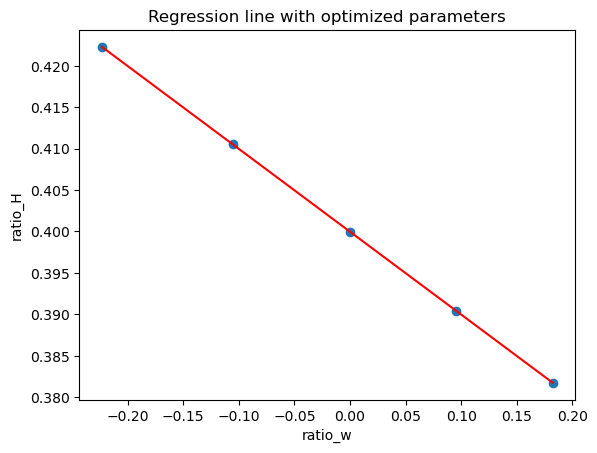

In [74]:
### BLOCK 4.2 ###

# Illustrating the datapoints and regression line using the optimized alpha and sigma-values.

# Initialize class instance with optimal parameters
func = HouseholdOptimizationClass()
func.par.alpha = best_alpha
func.par.sigma = best_sigma

# Get regression equation parts
ratio_H, ratio_w = func.get_ratios()

# Calculate regression line
slope, intercept, _, _, _ = stats.linregress(ratio_w, ratio_H)
regression_line = slope * ratio_w + intercept

# Plot the data and regression line

fig, ax = plt.subplots()
ax.scatter(ratio_w, ratio_H)
ax.plot(ratio_w, regression_line, color='red')
ax.set_xlabel('ratio_w')
ax.set_ylabel('ratio_H')
ax.set_title('Regression line with optimized parameters')
plt.show()


In [76]:
# We want to create a 3D plot here that shows the optimization results, but the plot currently does not work

# #Creating 3D-plot:
# fig = plt.figure(figsize = (10,10))
# ax = plt.axes(projection = "3d")

# alpha_grid, sigma_grid = np.meshgrid(np.linspace(0, 1, 50), np.linspace(0, 0.2, 50))
# aladdin = [alpha_grid, sigma_grid]
# errors = np.zeros_like(alpha_grid)

# for i in range(len(alpha_grid)):
#     for j in range(len(sigma_grid)):
#         errors[i,j] = objective_fnc([alpha_grid[i,j], sigma_grid[i,j]])

# best_alpha, best_sigma = optimize_result.x
# ax.scatter(best_alpha, best_sigma, loss, color='r', s=100, label='Optimized')
# ax.plot_surface(alpha_grid, sigma_grid, errors, cmap="viridis")
# ax.set_xlabel("alpha")
# ax.set_ylabel("sigma")
# ax.set_zlabel("errors")
# ax.set_title("How the std. error varies with different values for alpha and sigma")
# plt.legend()

# plt.show()

# Question 5

We will try to implement an extension to the model, that can produce the estimate results from the article for $\alpha = 0.5$.

We do this by scaling the disutility of hours worked in the market for the male agent as a way of modelling that he might be less reluctant to work after hours. We define the updated household preferences:

$$\max_{L_M, H_M, L_F, H_F} \frac{Q^{1-\rho}}{1-\rho}-\nu \left(\frac{(\mu_M L_M + H_M)^{1-\frac{1}{\epsilon}}}{1+\frac{1}{\epsilon}}+\frac{(\mu_F L_F + H_F)^{1-\frac{1}{\epsilon}}}{1+\frac{1}{\epsilon}} \right)$$

In [78]:
### BLOCK 5.1 ###
def objective_fnc(parameters):
    # Unpack parameters
    mu_F, mu_M, sigma = parameters

    # Print values of mu_F and mu_M
    print(f"mu_F = {mu_F}, mu_M = {mu_M}")
    
    # Initialize class instance
    func = HouseholdOptimizationClass()
    func.par.extention = True

    # Set parametes of func
    func.par.mu_F = mu_F
    func.par.mu_M = mu_M
    func.par.sigma = sigma

    # Get regression equation parts
    ratio_H, ratio_w = func.get_ratios()

    # Perform regression
    slope, intercept, _, _, _ = stats.linregress(ratio_w, ratio_H)

    # Calculate loss
    beta0_target = 0.4
    beta0 = intercept
    beta1_target = -0.1
    beta1 = slope
    loss = (beta0_target - beta0)**2 + (beta1_target - beta1)**2 
    print(f"beta0 = {beta0}, beta1 = {beta1}, loss = {loss}")
    print(ratio_H)
    return loss


""""""
# Perform optimization
x1 = (1.1, 0.1, 0.2)  # Initial guess

# Bounds for parameters mu, sigma
bounds_mu_F_mu_M_sigma = [(1e-8,2-1e-8),(1e-8,1-1e-8),(0-1e-8,1-1e-8)] 
optimize_result = optimize.minimize(objective_fnc, x1, method='Nelder-Mead', bounds = bounds_mu_F_mu_M_sigma)

# Extracting the optimized mu_F, mu_M and sigma and the loss
best_mu_F, best_mu_M, best_sigma = optimize_result.x
loss = optimize_result.fun

# Get regression results outside of objective function for beta0 and beta1
func = HouseholdOptimizationClass()
func.par.mu_F = best_mu_F
func.par.mu_M = best_mu_M
func.par.sigma = best_sigma
ratio_H, ratio_w = func.get_ratios()
slope, intercept, _, _, _ = stats.linregress(ratio_w, ratio_H)

# Printing the final parameters and results
print(f"best_mu_F = {best_mu_F}, best_mu_M = {best_mu_M}, best_sigma = {best_sigma}")
print(f"beta0 = {intercept:.4f}, beta1 = {slope:.4f}, loss = {loss}")
print(func.par.alpha)
print(ratio_w)
print(ratio_H)

mu_F = 1.1, mu_M = 0.1
beta0 = -3.479525031597e-06, beta1 = -0.20001373214377235, loss = 0.17000553024945864
[0.044623612822839116, 0.02107688246285157, -4.564783204149457e-06, -0.019065254192964426, -0.03647290927377408]
mu_F = 1.1550000000000002, mu_M = 0.1
beta0 = -3.479525031597e-06, beta1 = -0.20001373214377235, loss = 0.17000553024945864
[0.044623612822839116, 0.02107688246285157, -4.564783204149457e-06, -0.019065254192964426, -0.03647290927377408]
mu_F = 1.1, mu_M = 0.10500000000000001
beta0 = -3.479525031597e-06, beta1 = -0.20001373214377235, loss = 0.17000553024945864
[0.044623612822839116, 0.02107688246285157, -4.564783204149457e-06, -0.019065254192964426, -0.03647290927377408]
mu_F = 1.1, mu_M = 0.1
beta0 = -2.802076536767041e-06, beta1 = -0.2099861202644059, loss = 0.17209918831989743
[0.04685205325457524, 0.022124096220544467, -2.0807104446820924e-06, -0.020016677512902432, -0.03828891835046222]
mu_F = 1.1366666666666667, mu_M = 0.10333333333333336
beta0 = 2.61517869580129

mu_F = 0.00, mu_M = 0.00, sigma = 0.20, loss = 0.16
mu_F = 0.02, mu_M = 0.00, sigma = 0.20, loss = 0.16
mu_F = 0.04, mu_M = 0.00, sigma = 0.20, loss = 0.16
mu_F = 0.06, mu_M = 0.00, sigma = 0.20, loss = 0.16
mu_F = 0.08, mu_M = 0.00, sigma = 0.20, loss = 0.16
mu_F = 0.10, mu_M = 0.00, sigma = 0.20, loss = 0.16
mu_F = 0.12, mu_M = 0.00, sigma = 0.20, loss = 0.16
mu_F = 0.14, mu_M = 0.00, sigma = 0.20, loss = 0.16
mu_F = 0.16, mu_M = 0.00, sigma = 0.20, loss = 0.16
mu_F = 0.18, mu_M = 0.00, sigma = 0.20, loss = 0.16
mu_F = 0.20, mu_M = 0.00, sigma = 0.20, loss = 0.16
mu_F = 0.22, mu_M = 0.00, sigma = 0.20, loss = 0.16
mu_F = 0.24, mu_M = 0.00, sigma = 0.20, loss = 0.16
mu_F = 0.27, mu_M = 0.00, sigma = 0.20, loss = 0.16
mu_F = 0.29, mu_M = 0.00, sigma = 0.20, loss = 0.16
mu_F = 0.31, mu_M = 0.00, sigma = 0.20, loss = 0.16
mu_F = 0.33, mu_M = 0.00, sigma = 0.20, loss = 0.16
mu_F = 0.35, mu_M = 0.00, sigma = 0.20, loss = 0.16
mu_F = 0.37, mu_M = 0.00, sigma = 0.20, loss = 0.16
mu_F = 0.39,

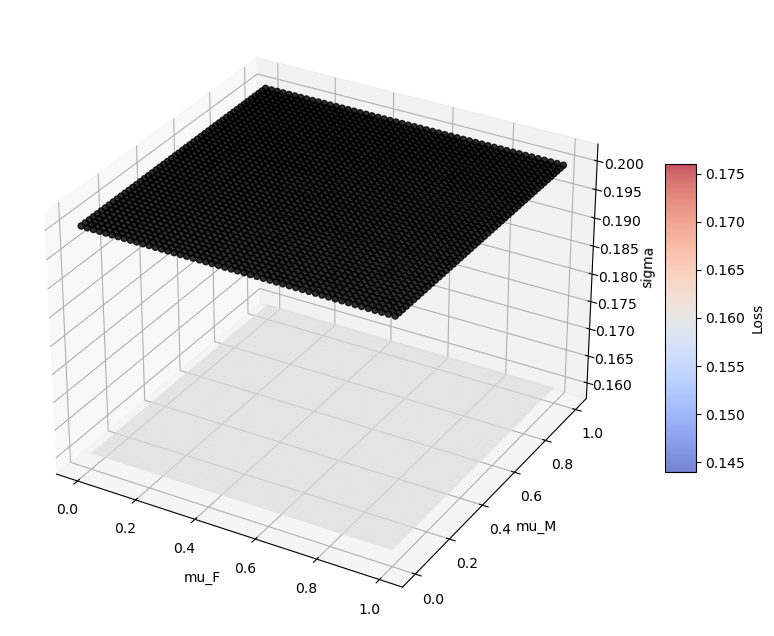

In [67]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Define objective function
def objective_fnc(parameters):
    # Unpack parameters
    mu_F, mu_M, sigma = parameters
    
    # ...rest of the code here...
    
    return loss

# Define bounds for parameters mu_F, mu_M and sigma
bounds_mu_F_mu_M_sigma = [(1e-8,1-1e-8),(1e-8,1-1e-8),(0-1e-8,1-1e-8)]

# Generate a grid of values for mu_F and mu_M
mu_F_grid, mu_M_grid = np.meshgrid(np.linspace(1e-8, 1-1e-8, 50), np.linspace(1e-8, 1-1e-8, 50))

# Initialize empty lists to store loss values and optimized values of sigma
losses = []
sigmas = []

# Iterate over grid values
for mu_F, mu_M in zip(mu_F_grid.ravel(), mu_M_grid.ravel()):
    # Set initial guess for sigma
    x0 = (mu_F, mu_M, 0.2)
    
    # Perform optimization
    optimize_result = optimize.minimize(objective_fnc, x0, method='Nelder-Mead', bounds=bounds_mu_F_mu_M_sigma)
    
    # Extract optimized sigma and loss
    sigma = optimize_result.x[2]
    loss = optimize_result.fun
    
    # Append to lists
    losses.append(loss)
    sigmas.append(sigma)
    
    # Print progress
    print(f"mu_F = {mu_F:.2f}, mu_M = {mu_M:.2f}, sigma = {sigma:.2f}, loss = {loss:.2f}")
    
# Reshape loss and sigma lists into grids for plotting
loss_grid = np.reshape(losses, mu_F_grid.shape)
sigma_grid = np.reshape(sigmas, mu_F_grid.shape)

# Plot results
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot loss surface
surf = ax.plot_surface(mu_F_grid, mu_M_grid, loss_grid, cmap='coolwarm', alpha=0.7)
cbar = fig.colorbar(surf, shrink=0.5, aspect=10)
cbar.ax.set_ylabel('Loss')

# Plot sigma as a function of mu_F and mu_M
ax.scatter(mu_F_grid, mu_M_grid, sigma_grid, color='black', alpha=0.8)

ax.set_xlabel('mu_F')
ax.set_ylabel('mu_M')
ax.set_zlabel('sigma')

plt.show()


In [ ]:
### BLOCK 5.1 ###
def objective_fnc(parameters):
    # Unpack parameters
    mu = parameters
    
    # Initialize class instance
    func = HouseholdOptimizationClass()
    func.par.extention = True

    # Set parametes of func
    #func.par.alpha = 0.5
    func.par.mu = mu
    #func.par.sigma = sigma

    # Get regression equation parts
    ratio_H, ratio_w = func.get_ratios()

    # Perform regression
    slope, intercept, _, _, _ = stats.linregress(ratio_w, ratio_H)

    # Calculate loss
    beta0_target = 0.4
    beta0 = intercept
    beta1_target = -0.1
    beta1 = slope
    loss = (beta0_target - beta0)**2 + (beta1_target - beta1)**2 
    #print(beta0, beta1, loss)
    return loss


""""""
# Perform optimization
x1 = (0.5)  # Initial guess

# Bounds for parameters mu, sigma
bounds_mu_sigma = [(1e-8,2-1e-8)] 
optimize_result = optimize.minimize(objective_fnc, x1, method='Nelder-Mead', bounds = bounds_mu_sigma)
# best_mu, best_sigma = optimize_result.x
# print(f"best_mu = {best_mu}, best_sigma = {best_sigma}")

# Extracting the optimized alpha and sigma and the loss
best_mu = optimize_result.x
loss = optimize_result.fun

# Get regression results outside of objective function for beta0 and beta1
func = HouseholdOptimizationClass()
func.par.mu = best_mu
#func.par.sigma = best_sigma
ratio_H, ratio_w = func.get_ratios()
slope, intercept, _, _, _ = stats.linregress(ratio_w, ratio_H)

# Printing the final parameters and results
print(f"best_mu = {best_mu}")
print(f"beta0 = {intercept:.4f}, beta1 = {slope:.4f}, loss = {loss}")
print(func.par.alpha)

best_mu = [0.5]
beta0 = -0.0000, beta1 = -1.0000, loss = 0.9699852047240722
0.5


In [66]:
import matplotlib.pyplot as plt

# Lists to store beta0 and beta1 values
beta0_list = []
beta1_list = []

# Perform optimization
for mu in np.linspace(1e-8, 2-1e-8, 20):  # Range of mu values to optimize over
    x1 = (mu, 0.1)  # Initial guess for sigma
    optimize_result = optimize.minimize(objective_fnc, x1, method='Nelder-Mead', bounds=bounds_mu_sigma)
    best_mu, best_sigma = optimize_result.x
    func = HouseholdOptimizationClass()
    func.par.mu = best_mu
    func.par.sigma = best_sigma
    ratio_H, ratio_w = func.get_ratios()
    slope, intercept, _, _, _ = stats.linregress(ratio_w, ratio_H)
    beta0_list.append(intercept)
    beta1_list.append(slope)

# Plot beta0 and beta1 as functions of mu
plt.plot(np.linspace(1e-8, 2-1e-8, 20), beta0_list, label='beta0')
plt.plot(np.linspace(1e-8, 2-1e-8, 20), beta1_list, label='beta1')
plt.xlabel('mu')
plt.legend()
plt.show()


ValueError: not enough values to unpack (expected 3, got 2)

The result from the article where $\beta_0 = 0.4$ and $\beta_1 = -0.1$ suggests that for equal wage levels the woman has more working hours in home production. When the wage level of the woman increases relative to the male wage level it has implies more labor hours in the home production for the male as compared to the female home production hours. When we fix $\alpha$ at 0.5 it suggests that man and woman are equally productive in the home. This suggests that we would have to allow for some other source of heterogeneity of the utility function, since the data from the regression suggests that the two types are not representative and homogenous agents. We therefor suggest that male and female may have different preferences of working in the market and investigate whether this can help us match the data when the two sexes are assumed to be equally productive. 